In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants

In [11]:
data_file = open('electon_diffraction.txt', 'r')
rows = data_file.readlines()
data_init = [row.split('\t') for row in rows]
data = [[],[],[]]
for i in range(len(data_init)):
    data[0].append(eval(data_init[i][0].strip()))
    data[1].append(eval(data_init[i][1].strip()))
    data[2].append(eval(data_init[i][2].strip()))

In [12]:
data[0] = np.array([3000, 3500, 4000, 4500,5000])
U = data[0]
x = 1/np.sqrt(data[0])
y_1 = np.array(data[1])
y_2 = np.array(data[2])

In [13]:
y_1

array([2.972, 2.86 , 2.734, 2.38 , 2.162])

In [14]:
def f(x, m):
    return (m * x)
popt1, pcov1 = curve_fit(f, x, y_1)
popt2, pcov2 = curve_fit(f, x, y_2)

In [15]:
x_sample = np.linspace(0.014, 0.020, 50)
y_fit_1 = f(x_sample, popt1[0])
y_fit_2 = f(x_sample, popt2[0])

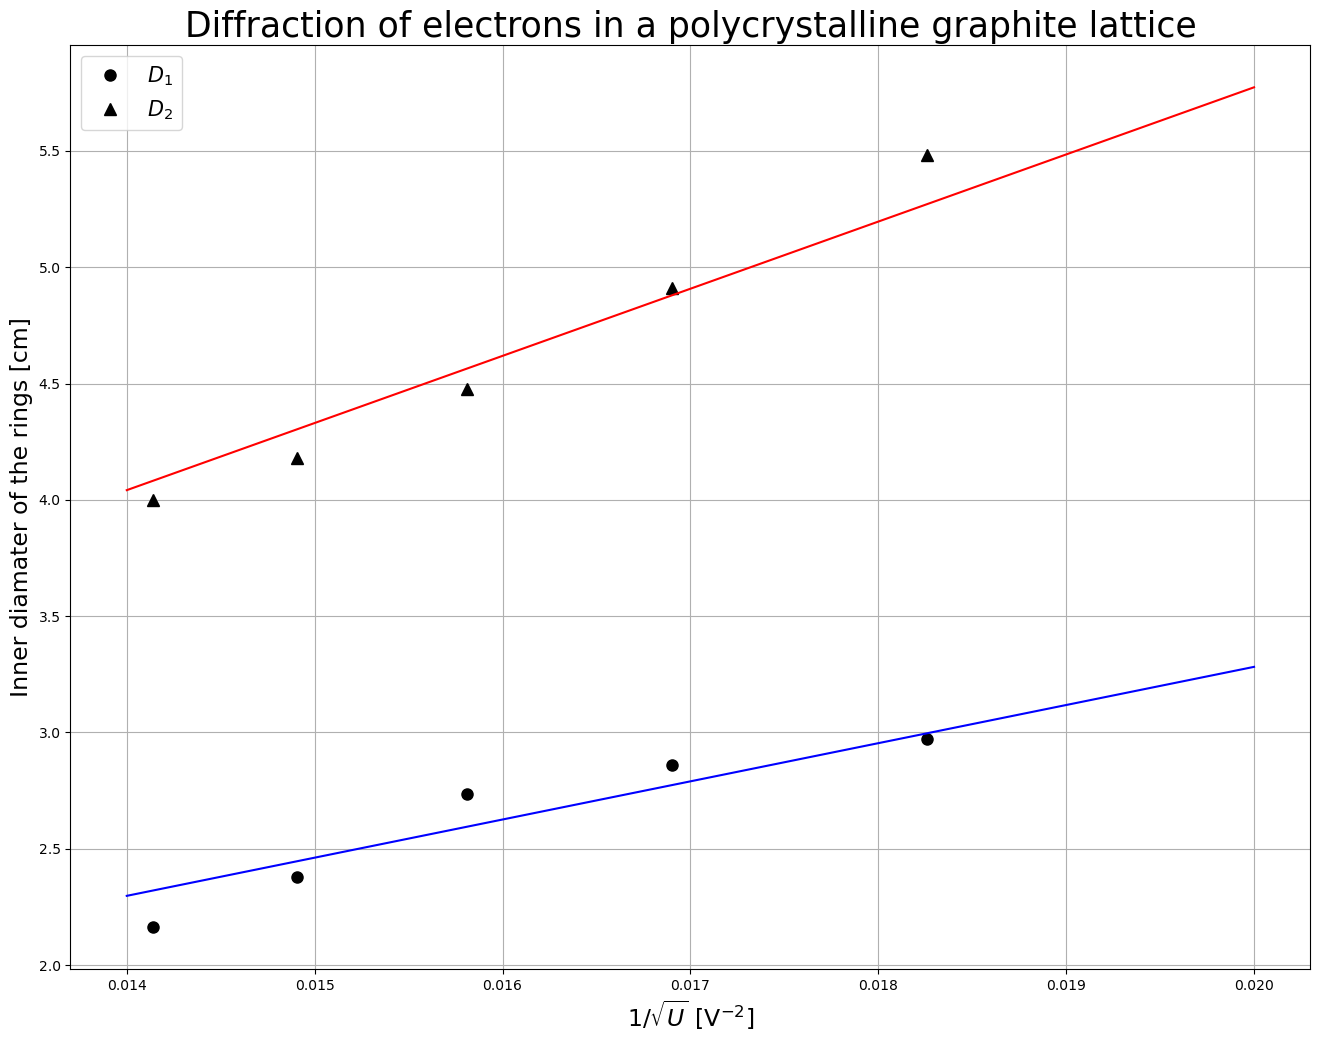

In [16]:
plt.style.use('default')
plt.figure(figsize=(16, 12))
# plt.xticks(tics)
plt.plot(x, y_1, 'ko', label=r"$D_1$", markersize=8)
plt.plot(x_sample, y_fit_1, 'b-', markersize=8)
plt.plot(x, y_2, 'k^', label=r"$D_2$", markersize=8)
plt.plot(x_sample, y_fit_2, 'r-', markersize=8)
plt.grid()
plt.xlabel(r"$1 /\sqrt{U}$ [V$^{-2}$]", fontsize=17)
plt.ylabel("Inner diamater of the rings [cm]", fontsize=17)
# plt.ylim(top=15.5)
plt.legend(loc='upper left', fontsize=15)
plt.title("Diffraction of electrons in a polycrystalline graphite lattice", fontsize=25)
plt.savefig("elec-diffraction.pdf", bbox_inches='tight', dpi=300)

In [71]:
k1 = popt1[0]
k2 = popt2[0]

In [93]:
e = constants.e
h = constants.h
m = constants.m_e
L = 13.5

In [94]:
d1 = (2*h*L)/(k1*np.sqrt(2*m*e))
d2 = (2*h*L)/(k2*np.sqrt(2*m*e))

In [95]:
lambda_2 = (d2*y_2)/(2*L)
lambda_1 = (d1*y_1)/(2*L)

In [96]:
lambda_1

array([2.22128337e-11, 2.13757418e-11, 2.04340133e-11, 1.77882047e-11,
       1.61588649e-11])

In [97]:
lambda_2

array([2.32896106e-11, 2.08595382e-11, 1.90242387e-11, 1.77582219e-11,
       1.69935138e-11])

In [98]:
lambda_avg = (lambda_1 + lambda_2) / 2

In [99]:
lambda_avg

array([2.27512222e-11, 2.11176400e-11, 1.97291260e-11, 1.77732133e-11,
       1.65761894e-11])

In [100]:
lambda_th = h / np.sqrt(2*m*e*U)

In [101]:
lambda_th

array([2.23913722e-11, 2.07303825e-11, 1.93914972e-11, 1.82824789e-11,
       1.73442823e-11])

In [102]:
err1 = abs(lambda_th - lambda_avg)/lambda_th * 100

In [104]:
rel_err_k1*k1

3.3223269389755496

In [103]:
rel_err_k1 = np.sqrt(np.diag(pcov1))[0]/k1
rel_err_k2 = np.sqrt(np.diag(pcov2))[0]/k2

In [105]:
err_d1 = rel_err_k1 * d1
err_d2 = rel_err_k2 * d2

In [106]:
err_d2

1.5155881200636132e-12

In [107]:
err_d1

4.085781304670666e-12

In [108]:
d2

1.1470621804935977e-10

In [ ]:
s1 = 

$d_1 = (2.236 \pm 0.0230) \times 10^{-12} \text{m}$

$d_2 = (1.264 \pm 0.006) \times 10^{-12} \text{m}$

In [124]:
rel_err_B1 = 
rel_err_B2 = 

In [122]:
rel_err_lambda_1 = np.sqrt(rel_err_B1**2 + rel_err_k1**2)
rel_err_lambda_2 = np.sqrt(rel_err_B2**2 + rel_err_k2**2)

In [123]:
err_lambda_1 = rel_err_lambda_1*lambda_1
err_lambda_2 = rel_err_lambda_2*lambda_2

In [125]:
rel_err_B1*y_1

array([0.30392473, 0.30392473, 0.30392473, 0.30392473, 0.30392473])

In [113]:
lambda_1_pm = lambda_1*1e12
lambda_1_err_pm = err_lambda_1*1e12
lambda_2_pm = lambda_2*1e12
lambda_2_err_pm = err_lambda_2*1e12

In [114]:
lambda_1_err_pm

array([0.44998694, 0.43304824, 0.41399314, 0.36046413, 0.32750646])

In [115]:
lambda_1_pm

array([22.21283374, 21.37574176, 20.43401328, 17.78820468, 16.15886492])

In [116]:
lambda_2_pm

array([23.28961064, 20.85953817, 19.02423868, 17.75822191, 16.99351379])

In [117]:
lambda_2_err_pm

array([0.3078378 , 0.27574345, 0.25150666, 0.23478929, 0.22469228])

In [118]:
lambda_th*1e12

array([22.39137223, 20.73038247, 19.39149717, 18.28247886, 17.34428235])

## Results

#### Lattice Plane distances
$$d_1 = (2.236 \pm 0.0230) \times 10^{-12} \text{m}$$
$$d_2 = (1.264 \pm 0.006) \times 10^{-12} \text{m}$$

#### Wavelength of Electrons and verification of de-Broglie Wavelength
|$\text{U}$|$\lambda_1 \text{ (pm)}$|$\lambda_2\text{ (pm)}$|$\lambda_{\text{theory}}\text{ (pm)}$|
|:---:|:---:|:---:|:---:|
|3.0| $22.50 \pm 0.25$| $22.49 \pm 0.11$|$22.39$|
|3.5| $22.50 \pm 0.25$| $20.92 \pm 0.10$|$20.73$|
|4.0| $22.50 \pm 0.25$| $19.26 \pm 0.10$|$19.39$|
|4.5| $22.50 \pm 0.25$| $18.08 \pm 0.09$|$18.28$|